# Herkenning van handgeschreven cijfers met Deep Learning 1

## Neurale Netwerken

Stijn Oomes

donderdag 15 september 2022

## Importeer libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers

from keras.datasets import mnist
from keras.layers import Dense

2022-09-15 09:29:59.750966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Verover de data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [5]:
train_labels.shape

(60000,)

## Prepareer de images

In [6]:
train_data = train_images.reshape((60000,28*28))

In [7]:
train_data.shape

(60000, 784)

In [8]:
train_data_floats = train_data.astype('float32')/255

In [9]:
train_data_floats.min()

0.0

In [10]:
train_data_floats.max()

1.0

In [11]:
test_data = test_images.reshape((10000,28*28))
test_data_floats = test_data.astype('float32')/255

In [12]:
test_data.shape

(10000, 784)

In [13]:
test_data_floats.max()

1.0

## Prepareer de labels

In [14]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [15]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
train_labels_encoded[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Maak een model

In [17]:
model = models.Sequential()

model.add(layers.Dense(512,
                       activation = 'relu',
                       input_shape=(28*28,)))
model.add(layers.Dense(128,
                       activation = 'relu'))
model.add(layers.Dense(10,
                       activation = 'softmax'))

2022-09-15 09:30:07.998757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 10,
    batch_size = 128,
    validation_data = (test_data_floats, test_labels_encoded)
)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2380 - accuracy: 0.9302 - val_loss: 0.1110 - val_accuracy: 0.9670
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0858 - accuracy: 0.9737 - val_loss: 0.0746 - val_accuracy: 0.9760
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0541 - accuracy: 0.9829 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0739 - val_accuracy: 0.9769
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0873 - val_accuracy: 0.9759
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0739 - val_accuracy: 0.9786
Epoch 

In [21]:
test_loss, test_acc =model.evaluate(test_data_floats, test_labels_encoded)

print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9806
0.9805999994277954


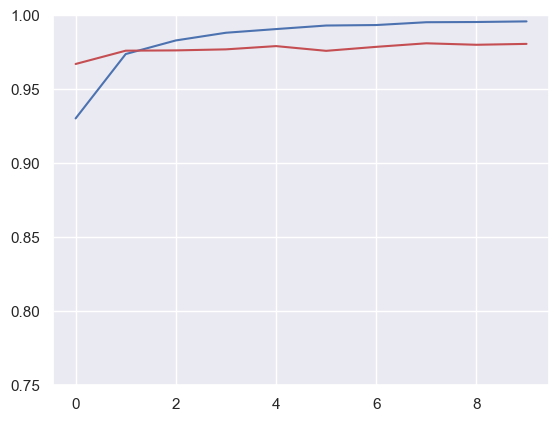

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()